<a href="https://colab.research.google.com/github/eadewusic/Summative_Assignment_1/blob/main/Summative_Assignment_Eunice_Adewusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
import os

# A library for programmatic plot generation.
import matplotlib.pyplot as plt

# library for data manipulation and analysis.
import joblib
import numpy as np
import pandas as pd

# LinearRegression from sklearn.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Import the unit tests defined for this notebook.

In [11]:
import w2_unittest

<a name='1'></a>
## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [12]:
path = "data/tvmarketing.csv"

### START CODE HERE ### (~ 1 line of code)
adv = pd.read_csv(path)
### END CODE HERE ###

In [13]:
# Print some part of the dataset.
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


##### __Expected Output__

```Python
	TV	Sales
0	230.1	22.1
1	44.5	10.4
2	17.2	9.3
3	151.5	18.5
4	180.8	12.9
```

In [14]:
w2_unittest.test_load_data(adv)

 All tests passed


`pandas` has a function to make plots from the DataFrame fields. By default, matplotlib is used at the backend. Let's use it here:

<Axes: xlabel='TV', ylabel='Sales'>

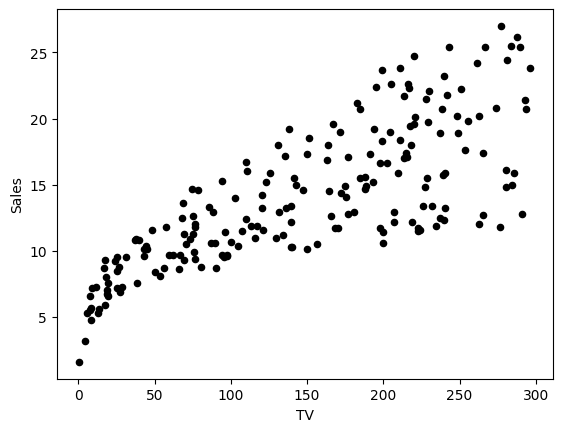

In [15]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

You can use this dataset to solve a simple problem with linear regression: given a TV marketing budget, predict sales.

<a name='2'></a>
## 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`

Save the required field of the DataFrame into variables `X` and `Y`:

In [16]:
X = adv['TV']
Y = adv['Sales']

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

You can use the function `np.polyfit(x, y, deg)` to fit a polynomial of degree `deg` to points $(x, y)$, minimising the sum of squared errors. You can read more in the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Taking `deg = 1` you can obtain the slope `m` and the intercept `b` of the linear regression line:

In [17]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301972. Intercept: 7.032593549127696


*Note*: [`NumPy` documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) suggests the [`Polynomial.fit` class method](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) as recommended for new code as it is more stable numerically. But in this simple example, you can stick to the `np.polyfit` function for simplicity.

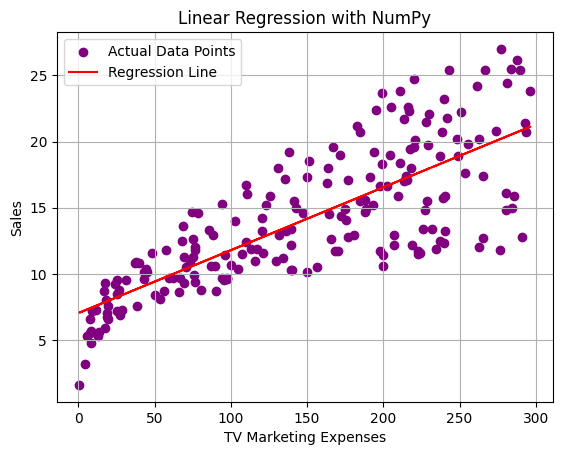

In [18]:
# visualise how well the linear regression model fits the data

# create a scatter plot of the original data points
plt.scatter(X, Y, color='purple', label='Actual Data Points')

# calculate predicted values using the slope and intercept
Y_pred = m_numpy * X + b_numpy

# plot regression line
plt.plot(X, Y_pred, color='red', label='Regression Line')

# add labels and legend
plt.xlabel('TV Marketing Expenses')
plt.ylabel('Sales')
plt.title('Linear Regression with NumPy')
plt.legend()
plt.grid(True)
plt.show()

<a name='ex02'></a>
### Exercise 2

Make predictions substituting the obtained slope and intercept coefficients into the equation $Y = mX + b$, given an array of $X$ values.

In [19]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):

    Y = m * X + b # to get predicted value of Y

    return Y

In [20]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]
```

In [21]:
w2_unittest.test_pred_numpy(pred_numpy)

 All tests passed


<a name='2.2'></a>
### 2.2 - Linear Regression with `Scikit-Learn`

`Scikit-Learn` is an open-source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. `Scikit-learn` provides dozens of built-in machine learning algorithms and models, called **estimators**. Each estimator can be fitted to some data using its `fit` method. Full documentation can be found [here](https://scikit-learn.org/stable/).

Create an estimator object for a linear regression model:

In [22]:
lr_sklearn = LinearRegression()

The estimator can learn from data calling the `fit` function. However, trying to run the following code you will get an error, as the data needs to be reshaped into 2D array:

In [23]:
print(f"• Shape of X array: {X.shape}")
print(f"• Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

• Shape of X array: (200,)
• Shape of Y array: (200,)
Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


You can increase the dimension of the array by one with `reshape` function, or there is another another way to do it:

In [24]:
# X_sklearn = X[:, np.newaxis]
# Y_sklearn = Y[:, np.newaxis]

# convert DataFrame X to a NumPy array and reshape it
X_sklearn = X.to_numpy().reshape(-1, 1)  # Reshape to have one column
Y_sklearn = Y.to_numpy().reshape(-1, 1)  # Reshape to have one column

print(f"• Shape of new X array: {X_sklearn.shape}")
print(f"• Shape of new Y array: {Y_sklearn.shape}")

• Shape of new X array: (200, 1)
• Shape of new Y array: (200, 1)


You have already loaded your dataset into X_sklearn and Y_sklearn
Step 1: Split the data into training and testing sets use train_test_split from sklearn
The test size shoukd be 20% of the data

In [25]:

X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=0.2, random_state=42) # 80% for training, 20% for testing


Step 2: Fit the linear regression model to the training data


In [26]:
lr_sklearn.fit(X_train, Y_train) #Insert proper arguments fro training asper step 1

LinearRegression()


 Step 3: Make predictions using the fitted model on the testing data


In [27]:
Y_pred = lr_sklearn.predict(X_test) #use test data from X from step 1 above)

 Step 4: Calculate the RMSE
Using sklearn.metrics - mean_squared_error

In [28]:
#Insert your code here
rmse =  np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Square Error:", rmse)

Root Mean Square Error: 3.194472431998898


TO DO Create an estimator object for Random Forest and Desision Trees and compare RSMES:

In [29]:
# To do
#Print out the rank of models From the best to the worst performing and associated RSMEs

#Replace the code below with appropriatly

# Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train/Fit the models using ravel() to flatten Y_train
lr_model.fit(X_train, Y_train.ravel())
rf_model.fit(X_train, Y_train.ravel())
dt_model.fit(X_train, Y_train.ravel())

# Make predictions
Y_pred_lr = lr_model.predict(X_test)
Y_pred_rf = rf_model.predict(X_test)
Y_pred_dt = dt_model.predict(X_test)

# Calculate RMSE for both models
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))

model_rank = {
'linear regression' : rmse_lr,
'Random Forest' : rmse_rf,
'Decision Trees' : rmse_dt
}

model_rank

{'linear regression': np.float64(3.194472431998898),
 'Random Forest': np.float64(3.017054389029325),
 'Decision Trees': np.float64(3.445214071723265)}

The estimator can learn from data calling the `fit` function for RandomForest and Decision Trees

Compare the RSME for the three different models and rank them according to performance i.e Print out Model Rank and Associated RSME

In [30]:
# Sort the models by RMSE
model_rank = dict(sorted(model_rank.items(), key=lambda item: item[1]))

print("Model Performance Ranking from Best to Worst (based on RMSE):")
for model, rmse in model_rank.items():
    print(f"• {model}: {rmse}")


Model Performance Ranking from Best to Worst (based on RMSE):
• Random Forest: 3.017054389029325
• linear regression: 3.194472431998898
• Decision Trees: 3.445214071723265


<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [31]:
### START CODE HERE ### (~ 1 line of code)
lr_sklearn.fit(X_sklearn, Y_sklearn)
### END CODE HERE ###

LinearRegression()

In [32]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [33]:
w2_unittest.test_sklearn_fit(lr_sklearn)

 All tests passed


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [34]:
# This is organized as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    ### START CODE HERE ### (~ 2 lines of code)
    # Use np.newaxis to increase the dimension of X
    X_2D = X[:, np.newaxis]  # Adds a new axis to make X a 2D array

    # Use the model to predict Y based on the reshaped X
    Y = lr_sklearn.predict(X_2D)
    ### END CODE HERE ###

    return Y

In [35]:
Y_pred_sklearn = pred_sklearn(X_pred, lr_sklearn)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [36]:
w2_unittest.test_sklearn_predict(pred_sklearn, lr_sklearn)

 All tests passed


You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

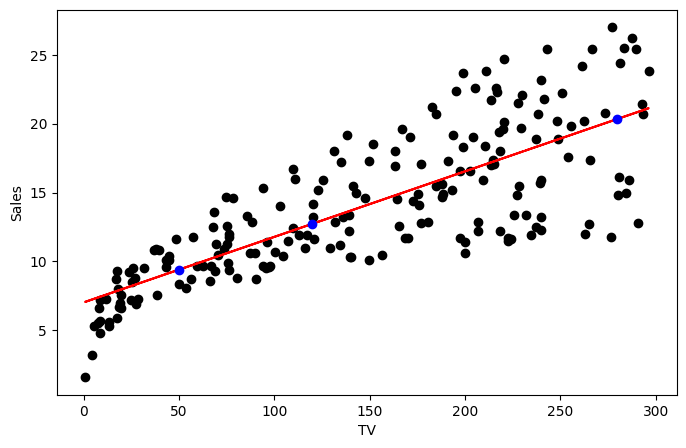

In [37]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(X, Y, 'o', color='black')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')

ax.plot(X, m_sklearn[0][0]*X+b_sklearn[0], color='red')
ax.plot(X_pred, Y_pred_sklearn, 'o', color='blue')

<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [38]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [39]:
# Define the cost function E(m, b, X, Y)
def E(m, b, X, Y):
    # Number of data points
    n = len(Y)

    # Calculate predictions and the squared errors
    predictions = m * X + b
    squared_errors = (predictions - Y) ** 2

    # Compute the mean squared error
    return np.sum(squared_errors) / (2 * n)

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [40]:
# Partial derivative of the cost function with respect to m
def dEdm(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Compute predictions and their differences from actual values, then calculate the gradient
    n = len(Y)
    predictions = m * X + b
    res = np.mean((predictions - Y) * X)

    ### END CODE HERE ###
    return res


# Partial derivative of the cost function with respect to b
def dEdb(m, b, X, Y):
    ### START CODE HERE ### (~ 1 line of code)
    # Sum the differences between predictions and actual values to calculate the gradient
    n = len(Y)
    predictions = m * X + b
    res = np.mean(predictions - Y)
    ### END CODE HERE ###

    return res

In [41]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.21777557513839405
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [42]:
w2_unittest.test_partial_derivatives(dEdm, dEdb, X_norm, Y_norm)

 All tests passed


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [43]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate=0.001, num_iterations=1000, print_cost=False):
    for iteration in range(num_iterations):
        ### START CODE HERE ### (~ 2 lines of code)
        dm = dEdm(m, b, X, Y)  # Calculate the gradient with respect to m
        db = dEdb(m, b, X, Y)  # Calculate the gradient with respect to b
        m_new = m - learning_rate * dm  # Update m
        b_new = b - learning_rate * db  # Update b
        ### END CODE HERE ###

        m = m_new
        b = b_new

        if print_cost:
            print(f"Cost after iteration {iteration}: {E(m, b, X, Y)}")  # Print cost if specified

    return m, b

In [44]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(np.float64(0.4946040826958948), np.float64(-1.366773361155534e-16))
(np.float64(0.9791767513915026), np.float64(4.521910375044022))


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [45]:
w2_unittest.test_gradient_descent(gradient_descent, dEdm, dEdb, X_norm, Y_norm)

 All tests passed


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [46]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564455
Cost after iteration 2: 0.19408205457659172
Cost after iteration 3: 0.19406325777502956
Cost after iteration 4: 0.1940625059029671
Cost after iteration 5: 0.1940624758280846
Cost after iteration 6: 0.1940624746250893
Cost after iteration 7: 0.19406247457696948
Cost after iteration 8: 0.1940624745750447
Cost after iteration 9: 0.19406247457496772
Cost after iteration 10: 0.19406247457496462
Cost after iteration 11: 0.1940624745749645
Cost after iteration 12: 0.19406247457496448
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22: 0

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [47]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


In [48]:
# Function to save models with RMSE
def save_model_with_rmse(model, model_name, rmse):
    # Create the models directory if it doesn't exist
    os.makedirs("models/", exist_ok=True)

    # Define the path to save the model
    model_path = f"models/{model_name}.pkl"

    # Save the model and RMSE in a dictionary using joblib
    joblib.dump({'model': model, 'rmse': rmse}, model_path)

    # Print a confirmation message
    print(f"Saved {model_name} to {model_path}")

# Save models with RMSE
# Assuming lr_model, rf_model, dt_model are already trained models
save_model_with_rmse(lr_model, "lr_model", 3.1944)  # Save linear regression model
save_model_with_rmse(rf_model, "rf_model", 3.0170)  # Save random forest model
save_model_with_rmse(dt_model, "dt_model", 3.4452)  # Save decision tree model

# Prepare parameters for the Gradient Descent model
# Assuming m_gd and b_gd are the coefficients for the gradient descent
gd_params = {
    'm_gd': m_gd,  # Gradient descent slope
    'b_gd': b_gd,  # Gradient descent intercept
    'X_mean': np.mean(X),  # Mean of input features
    'X_std': np.std(X),    # Standard deviation of input features
    'Y_mean': np.mean(Y),  # Mean of output target
    'Y_std': np.std(Y)     # Standard deviation of output target
}

# Save the gradient descent parameters using joblib
joblib.dump(gd_params, 'models/gd_params.pkl')
print("Saved gd_params to models/gd_params.pkl")

Saved lr_model to models/lr_model.pkl
Saved rf_model to models/rf_model.pkl
Saved dt_model to models/dt_model.pkl
Saved gd_params to models/gd_params.pkl


In [ ]:
!pip install fastapi
!pip install uvicorn

In [ ]:
#What imports do we need for Fast api

from enum import Enum
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field
import uvicorn

In [ ]:
# Initialize FastAPI app
app = FastAPI()

# Define model types using Enum
class ModelType(str, Enum):
    LINEAR_REGRESSION = "Linear Regression"
    RANDOM_FOREST = "Random Forest"
    DECISION_TREE = "Decision Tree"
    GRADIENT_DESCENT = "Gradient Descent"

# Pydantic model for input data
class TV(BaseModel):
    tv_spend: float = Field(..., description="TV marketing expenses/spend")
    modelType: ModelType = Field(default=ModelType.LINEAR_REGRESSION, description="Model type")

# Pydantic model for prediction response
class PredictionResponse(BaseModel):
    tv_spend: float
    predicted_sales: float
    modelType: str
    modelRmse: str

# Load the models using joblib
def load_models():
    models = {}
    try:
        # Load the scikit-learn models
        # Updated paths to include 'models/' directory
        models['lr_model'] = joblib.load('models/lr_model.pkl')
        models['dt_model'] = joblib.load('models/dt_model.pkl')
        models['rf_model'] = joblib.load('models/rf_model.pkl')

        # Load Gradient Descent parameters
        # Updated path to include 'models/' directory
        gd_params = joblib.load('models/gd_params.pkl')
        models['gd_model'] = {
            'm': gd_params['m_gd'],
            'b': gd_params['b_gd'],
            'x_mean': gd_params['X_mean'],
            'x_std': gd_params['X_std'],
            'y_mean': gd_params['Y_mean'],
            'y_std': gd_params['Y_std']
        }
    except Exception as e:
        raise RuntimeError(f"Failed to load models: {str(e)}")

    return models

# Initialize models
models = load_models()

@app.post("/predict", response_model=PredictionResponse)
async def predict(data: TV):
    """
    Predict sales based on TV marketing spend and selected model type.
    """
    try:
        if data.modelType not in ModelType:
            raise ValueError("Invalid model type specified.")

        # Prepare input for prediction
        tv_spend = np.array([[data.tv_spend]])

        # Get model information based on the selected model type
        if data.modelType == ModelType.GRADIENT_DESCENT:
            # Normalize input for Gradient Descent
            m = models['gd_model']['m']
            b = models['gd_model']['b']
            x_mean = models['gd_model']['x_mean']
            x_std = models['gd_model']['x_std']
            y_mean = models['gd_model']['y_mean']
            y_std = models['gd_model']['y_std']

            # Normalize the input
            tv_spend_normalized = (tv_spend - x_mean) / x_std

            # Make prediction using Gradient Descent
            prediction_normalized = (tv_spend_normalized * m + b)
            prediction = prediction_normalized * y_std + y_mean
            rmse = 'N/A'  # RMSE not applicable for this model
        else:
            # Use scikit-learn models for prediction
            model = models[data.modelType.value.lower() + '_model']
            prediction = model.predict(tv_spend)
            rmse = model.get('rmse', 'N/A')  # Retrieve RMSE if available

        # Create and return the prediction response
        response = PredictionResponse(
            tv_spend=float(data.tv_spend),
            predicted_sales=float(prediction[0]),
            modelType=data.modelType.value,
            modelRmse=str(rmse)
        )

        return response
    except ValueError as e:
        raise HTTPException(status_code=400, detail=str(e))
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"An error occurred: {str(e)}")

# if __name__ == "__main__":
#     import uvicorn
#     uvicorn.run(app, host="0.0.0.0", port=8000)

You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.